In [154]:
 # imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path
from dotenv import load_dotenv

In [155]:
# Import Data
production_path = Path("../data/Total_Energy_Production.csv")
consumption_path = Path("../data/Total_Energy_Use.csv")
Total_Energy_Nominal_Path = Path("../data/Total_Energy_Nominal_Prices.csv")
Renewable_Consumption_path = Path("../data/Renewable_Energy_Consumption.csv")
Renewable_Path = Path("../data/Renewable_Production.csv")


production_data = pd.read_csv(production_path)
consumption_data = pd.read_csv(consumption_path)
renewable_consumption = pd.read_csv(Renewable_Consumption_path, index_col="Year")
renewable_production_data = pd.read_csv(Renewable_Path, index_col="Year")
Total_Energy_Nominal_data = pd.read_csv(Total_Energy_Nominal_Path)
Prod_Price_combined_df = pd.concat([production_data, Total_Energy_Nominal_data], axis="columns", join="inner")
Consu_Price_combined_df = pd.concat([consumption_data, Total_Energy_Nominal_data], axis="columns", join="inner")
Consu_Prod_combined_df = pd.concat([consumption_data, production_data], axis="columns", join="inner")

In [174]:
# Define Panel Visualization Functions

def Production_plot():
    """Production Plot"""
    
    Production = production_data.loc[:, [ 'Year','Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return Production.hvplot.line(x='Year', y=['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads']).opts(title="Production", width=800)

def Production_bargraph():
    """Production Bargraph"""

    Production = production_data.loc[:, [ 'Year','Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return Production.hvplot.bar(x='Year', y=['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads'], height=600, width=1200, rot=90, title='Production Bar')

def Renewable_Consumption_Line():
    """Consumption Line Graph"""

    consumption = consumption_data.loc[:,['Year','Hydropower quads', 'Biomass quads', 'Other Renewable Energy quads']]

    return consumption.hvplot.line(x='Year', y=[ 'Hydropower quads', 'Biomass quads', 'Other Renewable Energy quads']).opts(title="Renewable Consumption", width=600)

def Consumption_Bargraph():
    """Consumption Bar Graph"""

    consumption = consumption_data.loc[:,['Year','Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return consumption.hvplot.bar(x='Year', y=['Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads'], height=600, width=1200, rot=90, title='Consumption Bar')

def Nonrenewable_Production():
    """Non-renewable Production"""

    Production = production_data.loc[:, [ 'Year','Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads']]

    return Production.hvplot.line(x='Year', y=['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads'], title='Non-renewable Energy Production')

def Renewable_Production_Line():
    """Renewable Production"""

    Production = production_data.loc[:, ['Year','Hydropower quads', 'Biomass quads',	'Other Renewable Energy quads']]

    return Production.hvplot.line(x='Year', y=['Hydropower quads','Biomass quads',	'Other Renewable Energy quads'], title='Renewable Energy Production').opts(title="Renewable Production", width=600)

def Renewable_Energy_Barchart():
    """Renewable Energy Barchart"""

    Production = production_data.loc[:, ['Year','Hydropower quads', 'Biomass quads','Other Renewable Energy quads']]

    return Production.hvplot.bar(
    title= "Renewable Energy Production", 
    x='Year', 
    y=['Hydropower quads', 'Biomass quads', 'Other Renewable Energy quads'], height=500, width=800, rot=90

)


def Nonrenewable_Consumption_Line():
    """Non-renewable Consumption Line"""

    consumption = consumption_data.loc[:,['Year','Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads']]

    return consumption.hvplot.line(
    title= "Non-renewable Energy Consumption", 
    x='Year', 
    y=[ 'Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads']

)

def Non_Renew_Prod_Heatmap():
    """Non-Renewable Production to Price Correlation Heatmap"""

    nonrenewable_production = production_data.loc[:, ['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Dry Natural Gas quads', 'Coal quads','Nuclear quads', 'Other quads']]

    Energy_Price = Total_Energy_Nominal_data.loc[:, ['West Texas Intermediate (nom $/b) nom $/b', 'Gas Price at Henry Hub (nom $/MMBtu) nom $/MMBtu', 'Coal at Minemouth (nom $/ton) nom $/ton', 'Electricity (nom cents/kWh) nom cents/kWh']]

    Prod_Price_combined_df = pd.concat([nonrenewable_production, Energy_Price], axis="columns", join="inner")

    Prod_Price_correlation = Prod_Price_combined_df.corr()

    fig = plt.Figure(figsize=(10, 6))
    fig.suptitle('Non-Renewable Production', fontsize=18)
    ax = fig.add_subplot(111)
    sns.heatmap(Prod_Price_correlation, vmin=-1, vmax=1, ax=ax)

    return pn.pane.Matplotlib(fig)
def Non_Renew_Use_Heatmap():
    """Non-Renewable consumption to Price Correlation Heatmap"""

    Energy_Consumption = pd.read_csv(consumption_path, index_col="Year")

    Nonrenewable_Consumption = Energy_Consumption.loc[:, ['Liquid Fuels quads', 'Natural Gas quads', 'Coal quads','Nuclear quads']]

    Energy_Price = Total_Energy_Nominal_data.loc[:, ['West Texas Intermediate (nom $/b) nom $/b', 'Gas Price at Henry Hub (nom $/MMBtu) nom $/MMBtu', 'Coal at Minemouth (nom $/ton) nom $/ton', 'Electricity (nom cents/kWh) nom cents/kWh']]

    Consu_Price_combined_df = pd.concat([Nonrenewable_Consumption, Energy_Price], axis="columns", join="inner")

    Consu_Price_correlation = Consu_Price_combined_df.corr()

    fig = plt.Figure(figsize=(8, 4))
    fig.suptitle('Non-Renewable Consumption', fontsize=18)
    ax = fig.add_subplot(111)
    sns.heatmap(Consu_Price_correlation, vmin=-1, vmax=1, ax=ax)

    return pn.pane.Matplotlib(fig)

def Stock_Figure():
    """Stock Figure"""

    portfolio_returns_figure = pn.panel('../data/Cumulative_Portfolio_Returns.png', width=800)

    return portfolio_returns_figure

def welcome_photo():
    """image"""

    welcome_image = pn.panel('../data/energy_image.png', width=600)

    return welcome_image

def Total_Energy_Consumption():
    """Total Energy Consumption"""

    consumption = consumption_data.loc[:,['Year','Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return consumption.hvplot.line(
    title= "Total Energy Consumption", 
    x='Year', 
    y=[ 'Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads']

)

def Total_Energy_Production():
    """Total Energy Production"""

    Production = production_data.loc[:, [ 'Year','Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return Production.hvplot.line(x='Year', y=['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads'],title='Total Energy Production')

def Renewable_Energy_Consumption_Stacked():
    """Renewable Energy Constumption Stacked Chart"""

    return consumption_data.hvplot.area(x='Year', y=['Hydropower quads','Biomass quads', 'Other Renewable Energy quads'], title="Renewable Energy Consumption",height=800, width=800, rot=90)

def Nonrenewable_Energy_Consumption_Stacked():
    """Nonrenewable Energy Consumption Stacked Chart"""

    return consumption_data.hvplot.area(title = "Nonrenewable Energy Consumption", 
    x='Year', 
    y=[ 'Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads'],height=800, width=800, rot=90)

def TAN_Simulation_Image():
    """TAN Simulation Image"""

    TAN_simulation_image = pn.panel('../data/TAN_Simulation_Image.png', width=600)

    return TAN_simulation_image

def TAN_Distribution_Image():
    """TAN Distribution Image"""

    TAN_distribution_image = pn.panel('../data/TAN_Distribution_Image.png', width=600)

    return TAN_distribution_image

def XLE_Simulation_Image():
    """XLE Simulation Image"""

    XLE_simulation_image = pn.panel('../data/XLE_Simulation_Image.png', width=600)

    return XLE_simulation_image

def XLE_Distribution_Image():

    XLE_distribution_image = pn.panel('../data/XLE_Distribution_Image.png', width=600)

    return XLE_distribution_image

def Nonrenewable_Beta_Image():

    nonrenewable_beta_image = pn.panel('../data/Nonrenewable_beta.png', width=600)

    return nonrenewable_beta_image
  
def Renewable_Beta_Image():

    renewable_beta_image = pn.panel('../data/Renewable_beta.png', width=600)

    return renewable_beta_image

In [185]:
consumption_data = consumption_data.iloc[20:-1]
production_data = production_data.iloc[15:-1]

welcome_row = pn.Row('###The future of Energy is constantly changing, with interest in Renewable Energy options increasing and the potential decrease of interest in Nonrenewable options. Our project will focus on the realistic projection of Renewable Energy takeover from Nonrenewable by analyzing energy demands, production and political regulation with the end goal of identifying stock options that will be \ profitable in each sector, as well as when one of the sector (renewable vs non renewable) will take over.', welcome_photo())
welcome_tab = pn.Column('#Future of Energy', welcome_row)
energy_row = pn.Row(Total_Energy_Consumption(),Total_Energy_Production())
energy_row_two = pn.Row(Renewable_Energy_Consumption_Stacked(), Nonrenewable_Energy_Consumption_Stacked())
energy_tab = pn.Column('#Renewable vs Nonrenewable Energy', '##According to the US EIA Energy Consumption continues to increase based on the data from the charts shown below, Nonrenewable Energy continues to dominate Energy Consumption and Production, while Renewable Energy continues to grow in demand', energy_row, energy_row_two)
stock_analysis = pn.Column('#Energy Stock Analysis', '##Comment', '###TAN Simulation',TAN_Simulation_Image, '###TAN Distribution', TAN_Distribution_Image(), '###XLE Simulation', XLE_Simulation_Image(), '###XLE Distribution', XLE_Distribution_Image())
risk_analysis = pn.Column('#Risk Analysis', '##This chart shows a a measurement of how renewable and non-renewable energy assets moves on average when the overall stock market fluctuates using beta.', '###Nonrenewable', Nonrenewable_Beta_Image(), '###Renewable', Renewable_Beta_Image())
panel = pn.Tabs(
    ("Welcome", welcome_tab),
    ("Renewable vs Nonrenewable Energy", energy_tab),
    ("Energy Stock Analysis", stock_analysis),
    ("Risk Analysis", risk_analysis))


Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] Markdown(str)
            [1] PNG(str, width=600)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(NdOverlay)
        [3] Row
            [0] HoloViews(NdOverlay)
            [1] HoloViews(NdOverlay)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] Column
            [0] Column()
            [1] Row
                [0] PNG(str, width=600)
        [4] Markdown(str)
        [5] PNG(str, width=600)
        [6] Markdown(str)
        [7] PNG(str, width=600)
        [8] Markdown(str)
        [9] PNG(str, width=600)
    [3] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] PNG(str, width=600)
        [4] Markdown(str)
        [5] PNG(str, width=600)
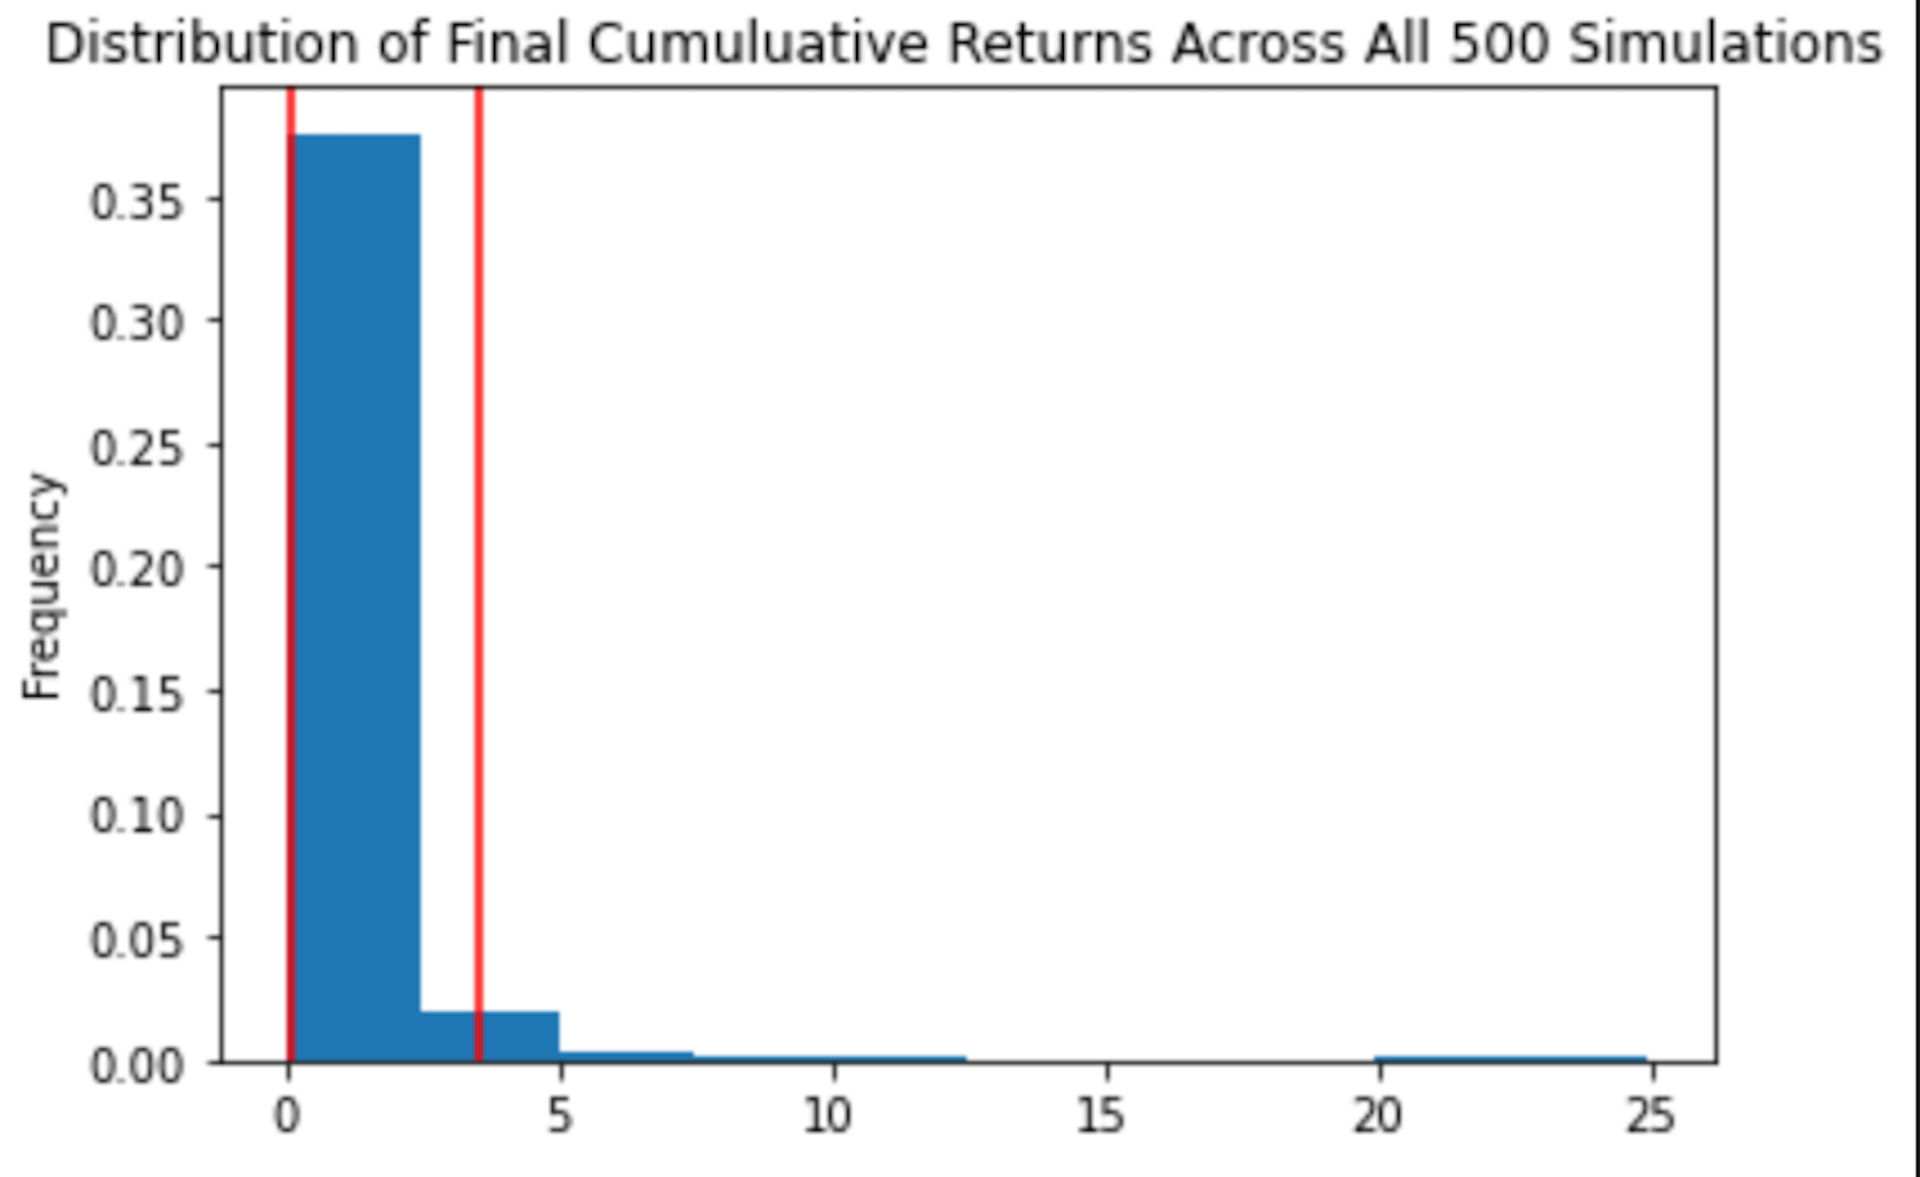
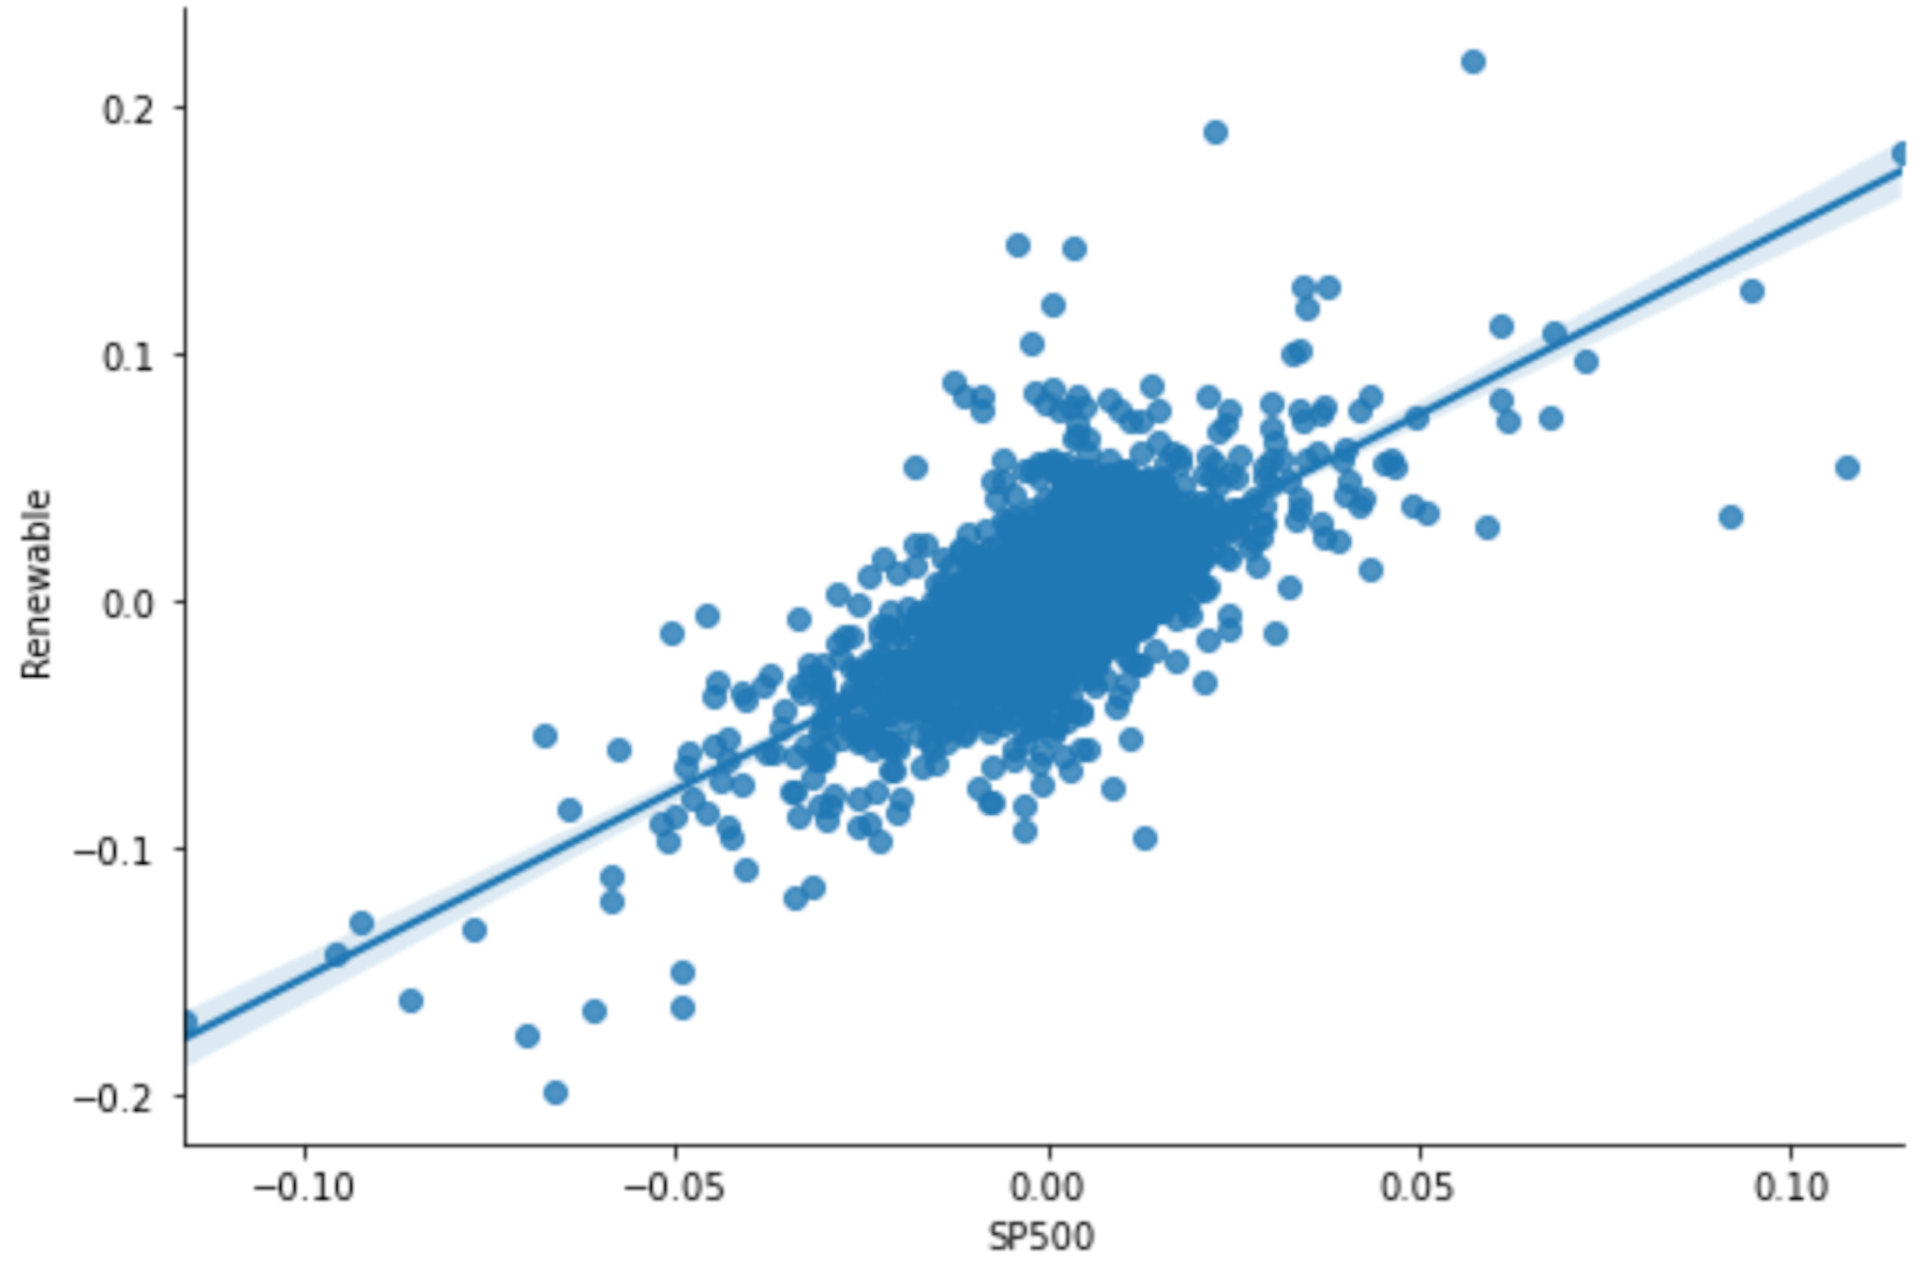
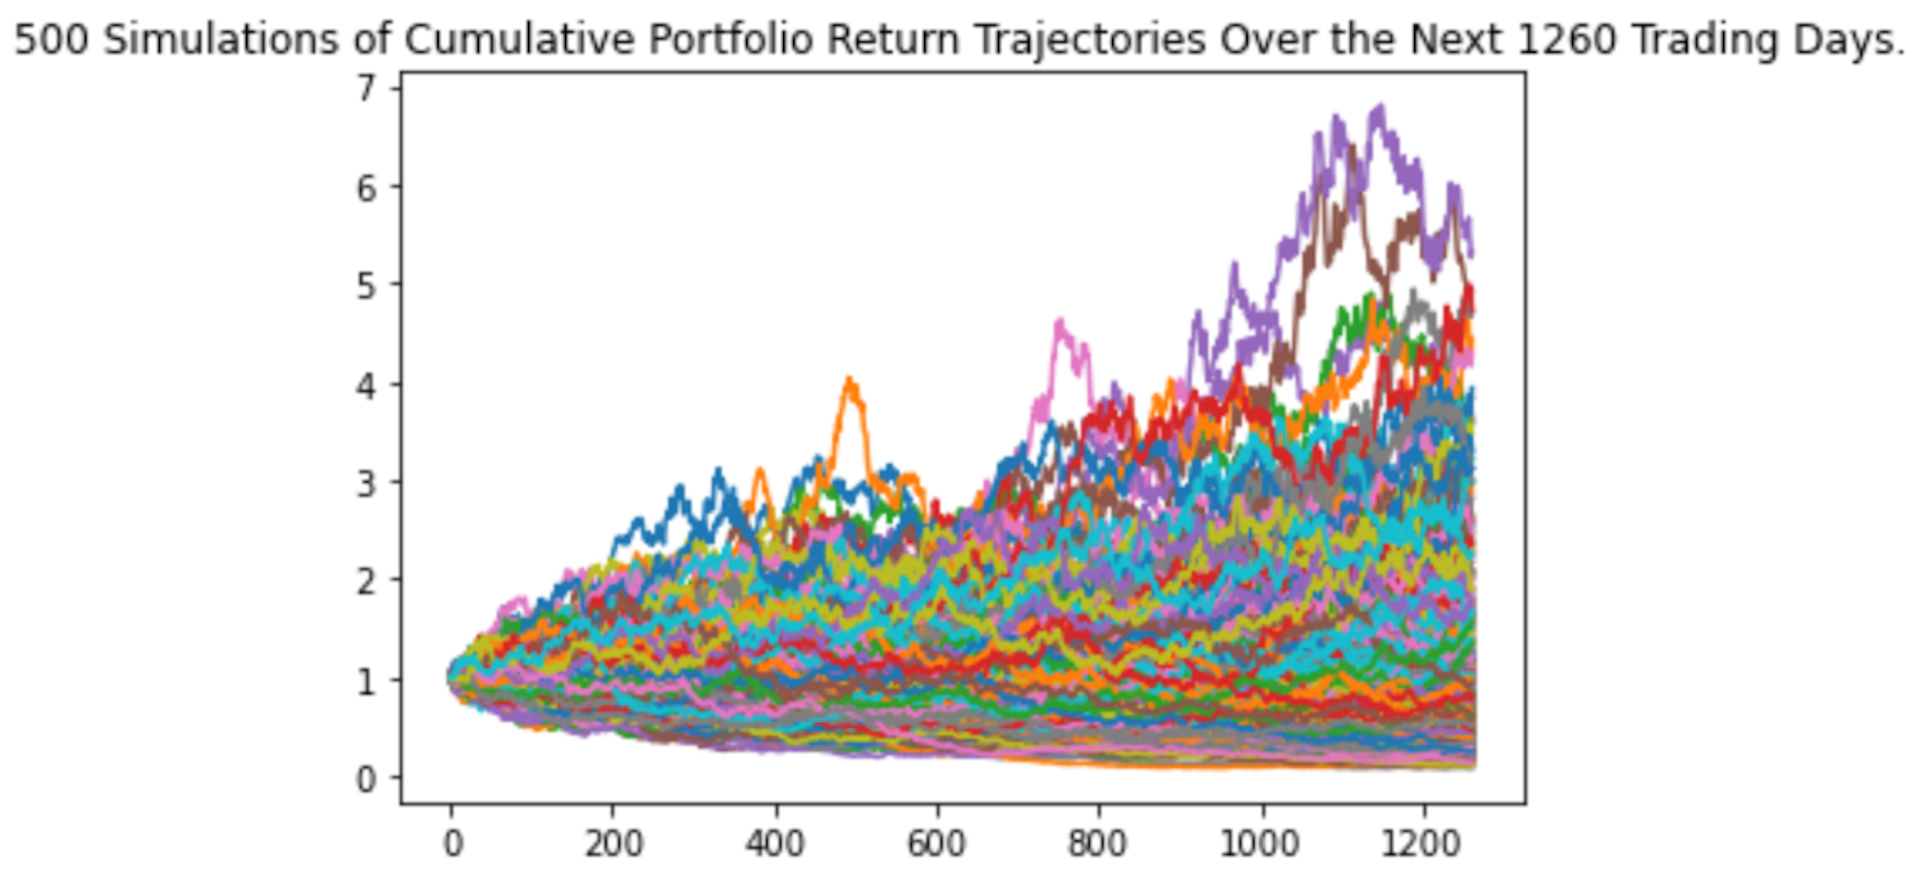
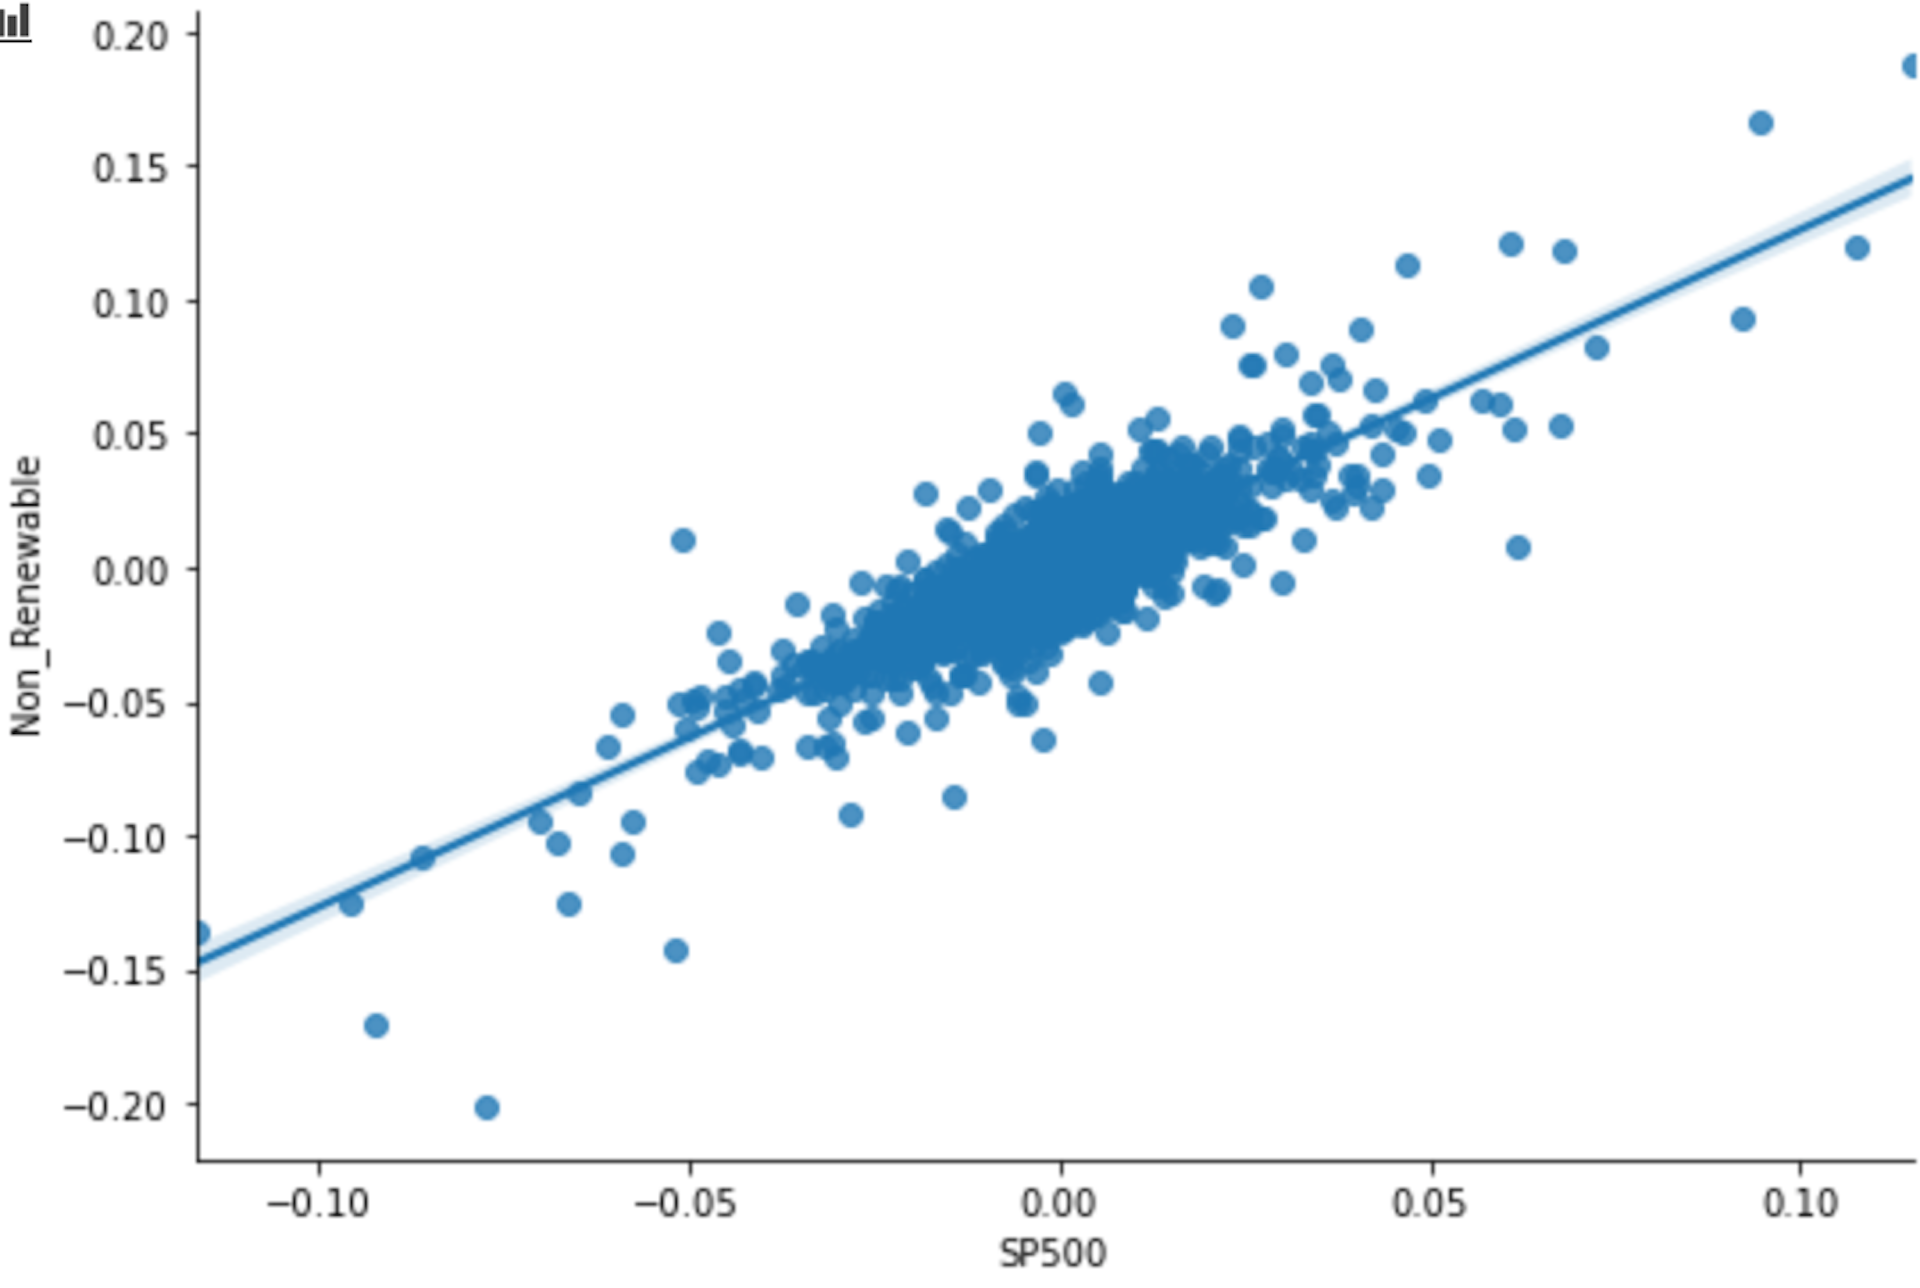
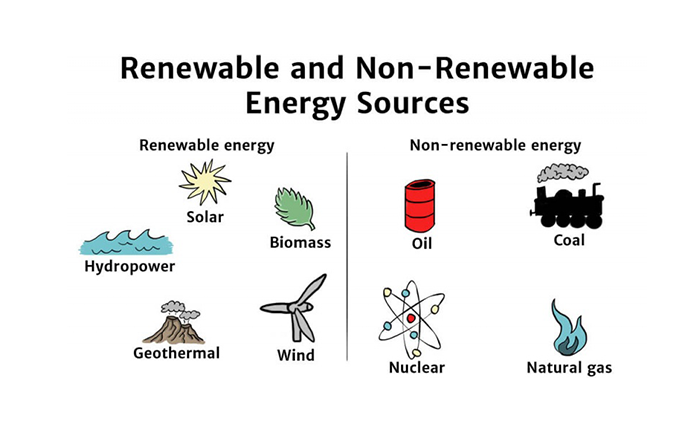
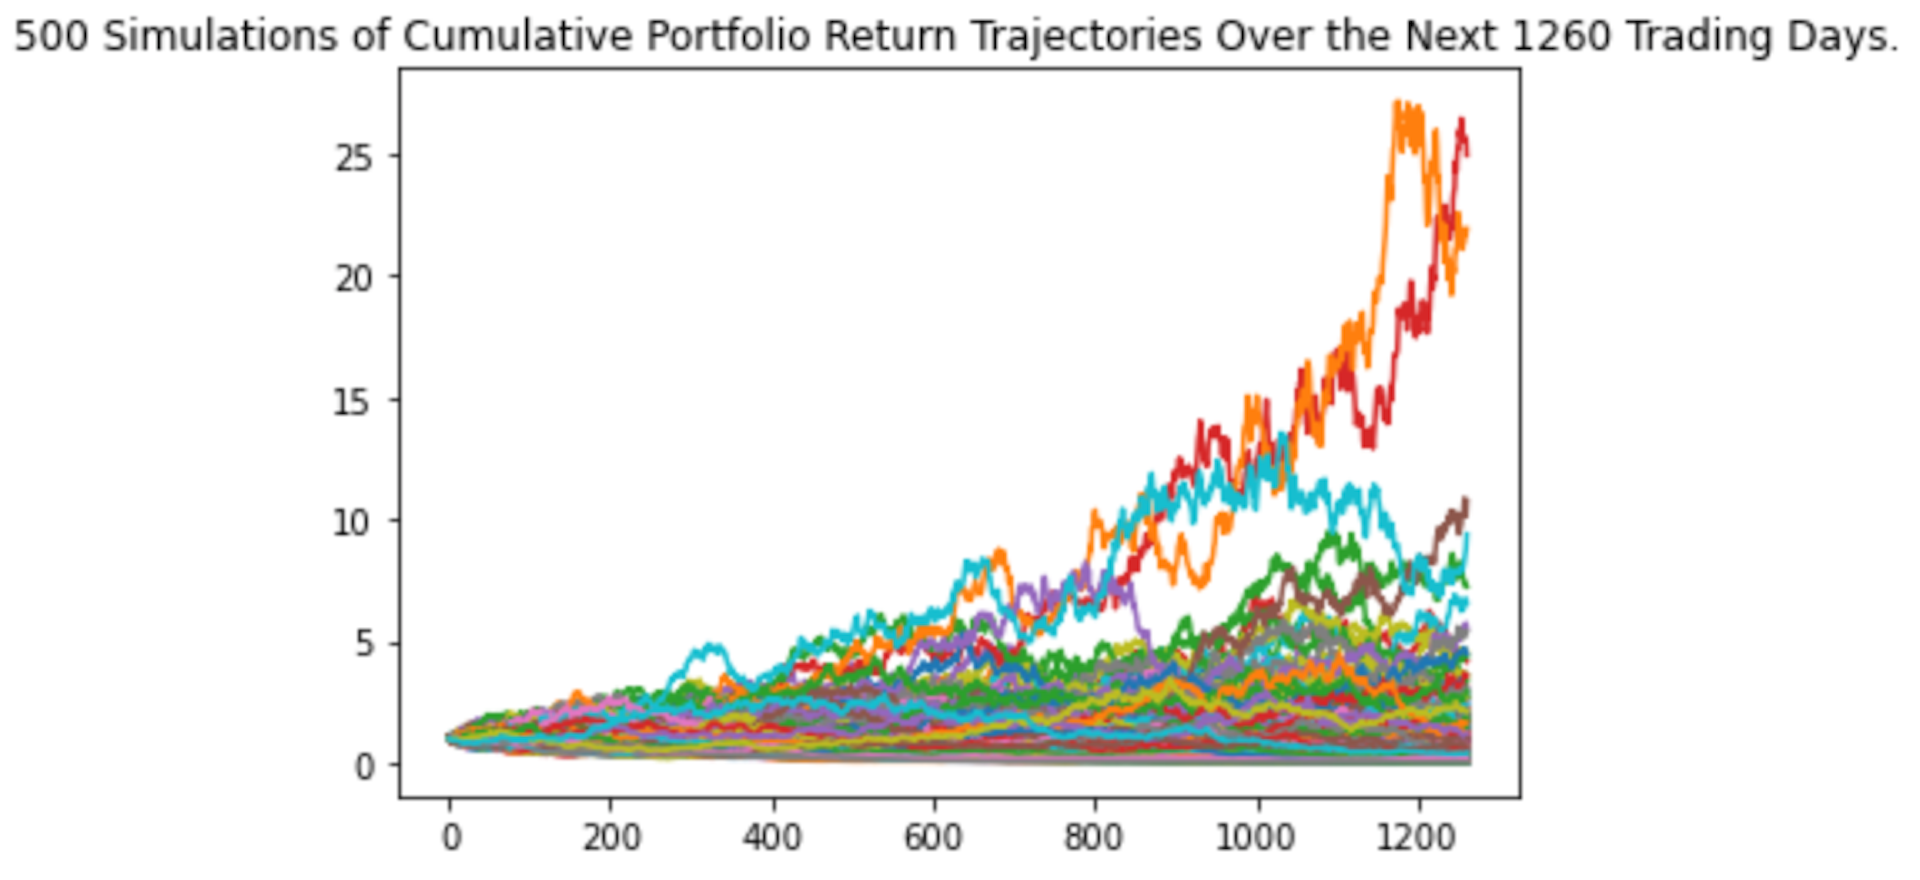
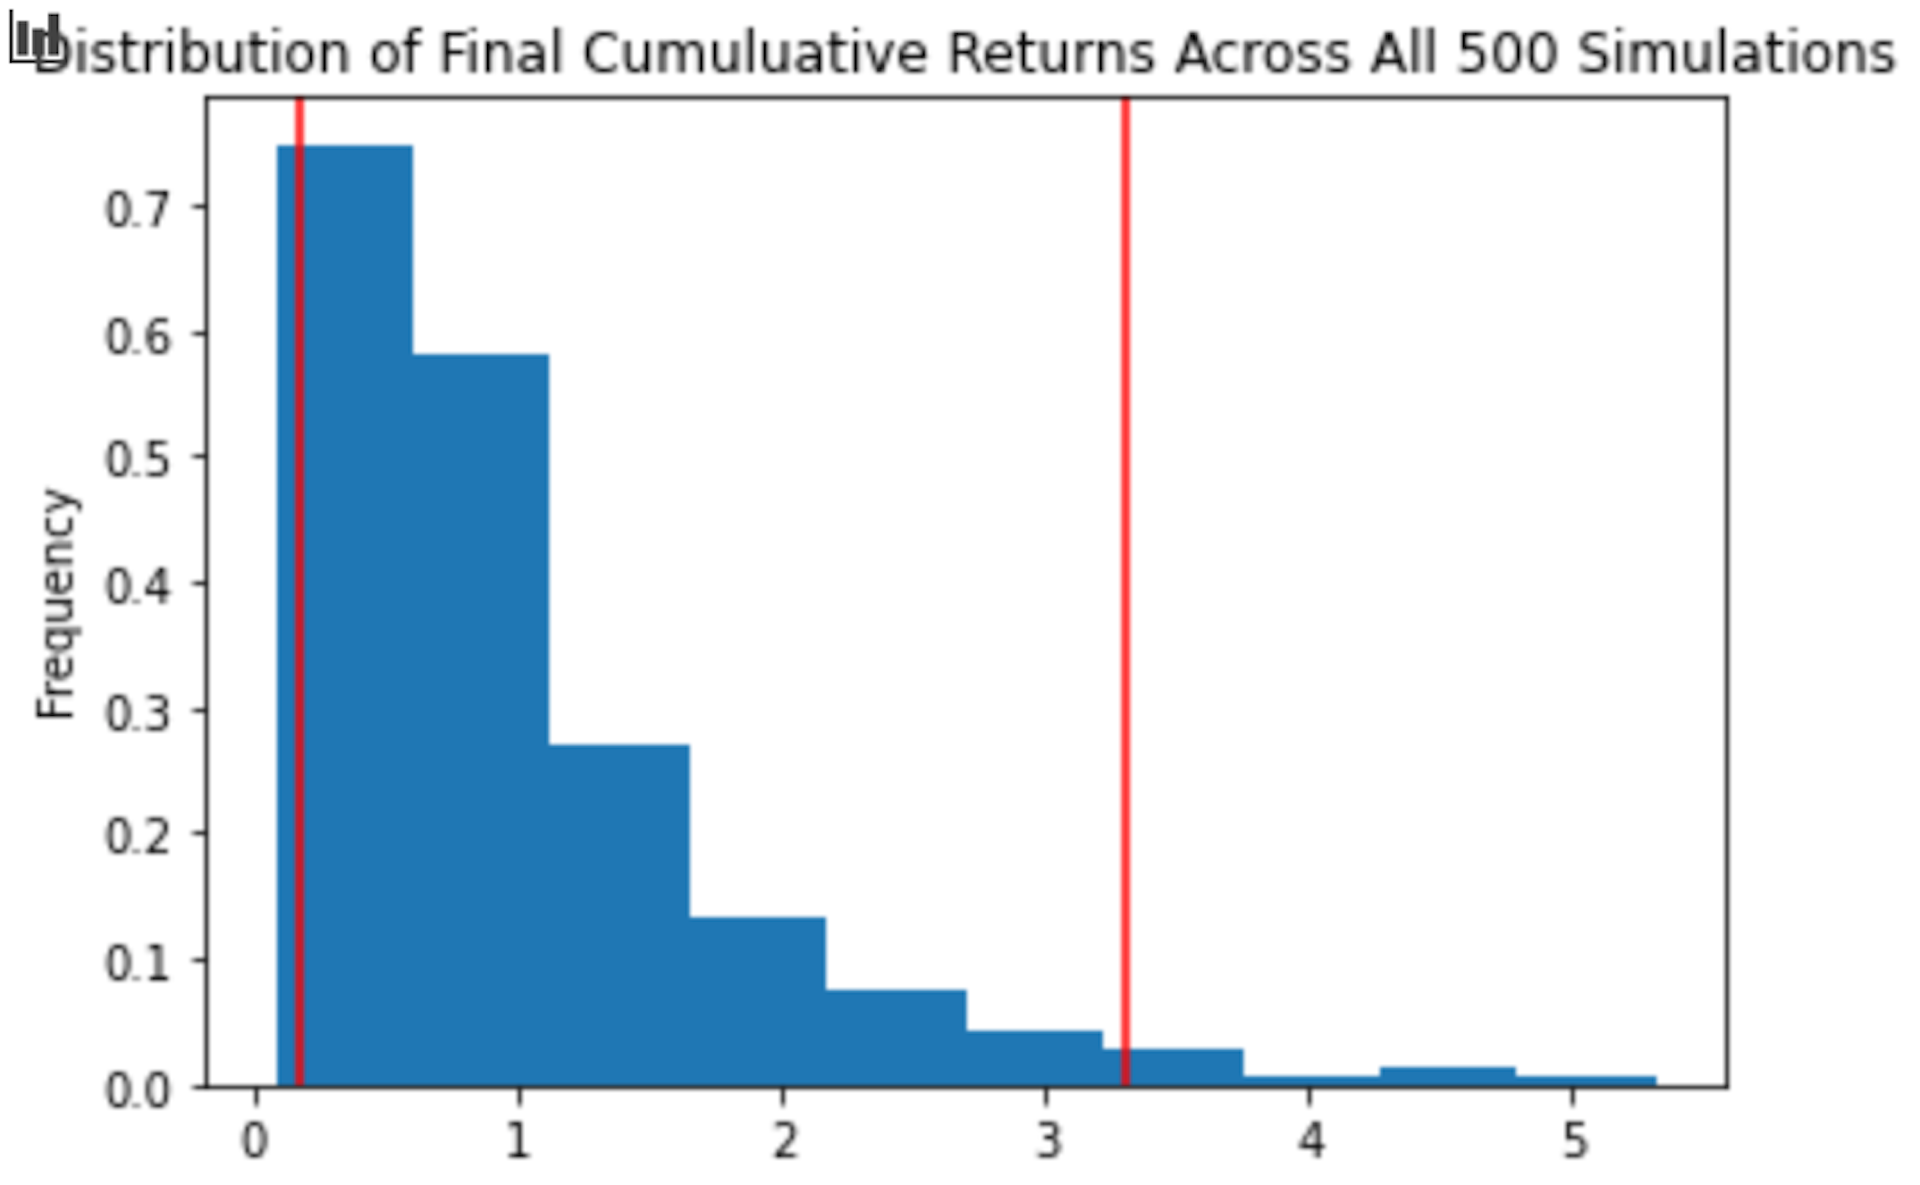

In [186]:
panel.servable()